## اضافه کردن کتابخانه‌های مورد نیاز

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## خواندن داده
می‌توانید صدک‌های ۱ تا ۹۹ را برای سال‌هایی بین 1963 تا 2016 ببینید. 

In [2]:
wealth_df = pd.read_csv('WealthDistribution.csv',index_col='year').T

In [3]:
wealth_df

year,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1963,-6405,-4430,-3458,-2689,-2080,-1514,-1003,-548,-295,-18,...,258679,281660,313318,349030,409182,466768,600177,758199,1457201,1599801
1983,-7939,-3542,-1932,-727,-85,0,0,0,302,724,...,575612,642318,714154,828443,959196,1146953,1450927,1972661,3323063,4000213
1989,-15151,-8975,-6437,-3526,-1586,-933,-224,0,0,0,...,743433,837491,937128,1057943,1293713,1563087,1907823,2516019,4330717,4834087
1992,-18951,-10985,-5954,-3807,-1895,-839,-84,0,0,0,...,650870,707220,808381,934681,1120282,1289766,1714132,2355443,3893734,4590321
1995,-19967,-11322,-7360,-4213,-2349,-940,-16,0,0,94,...,654746,742678,813696,923943,1071773,1241059,1573678,2068379,3851431,4490021
1998,-33773,-20804,-12617,-8440,-4426,-2375,-885,0,0,0,...,797337,865356,974392,1111757,1329092,1590543,1966490,2971055,5609395,5800321
2001,-29129,-16041,-9010,-4918,-2100,-677,0,0,0,135,...,1112319,1217740,1357290,1525752,1784068,2094058,2788419,4362268,7946202,8132983
2004,-32787,-17423,-11065,-6969,-3459,-1488,-216,0,1,254,...,1178878,1281956,1413306,1569226,1818012,2267587,2794360,4207818,8083447,8093976
2007,-36200,-21771,-12437,-8222,-5327,-2281,-892,0,0,35,...,1158941,1275647,1393208,1732275,2200426,2762677,3687120,5371453,9697843,9920123
2010,-88315,-56902,-37913,-26959,-17022,-11882,-7936,-4974,-2885,-1105,...,1176844,1325510,1544222,1818487,2060112,2428628,3147424,4725281,7534142,8012367


## نمودار توزیع
ابتدا نمودار توزیع ثروت در سالهای مختلف را رسم می‌کنیم.

Text(0, 0.5, 'Wealth dollars')

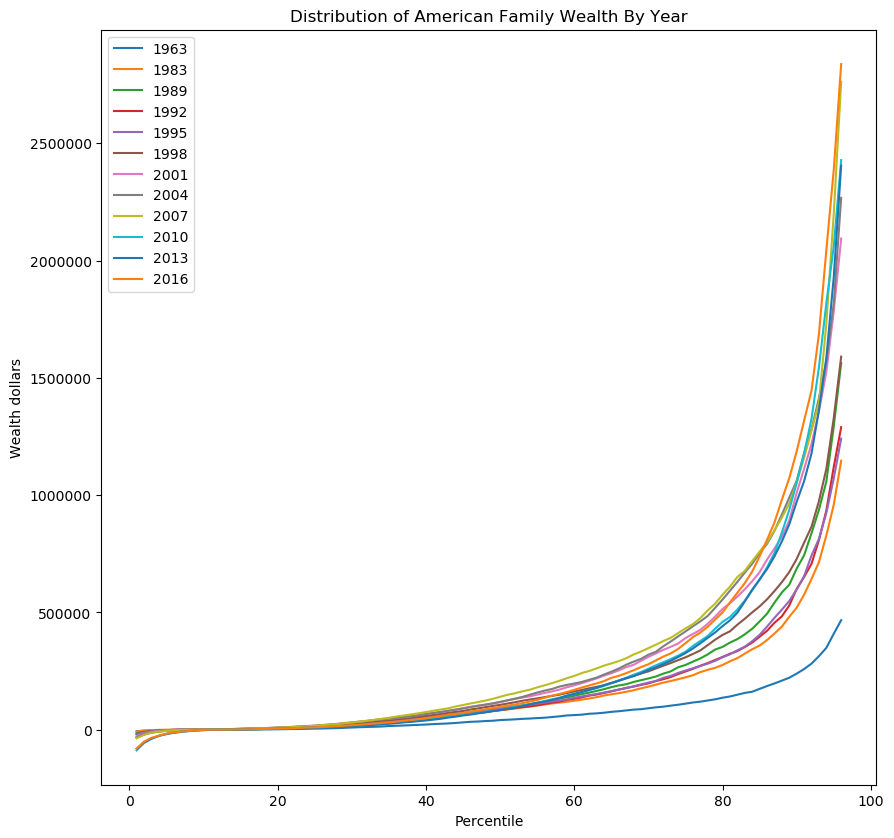

In [4]:
plt.figure(dpi=100,figsize=(10,10))
for index , row in wealth_df.iterrows():
    plt.plot(row[:-4].index,row[:-4].values,label=index)
plt.legend()
plt.title('Distribution of American Family Wealth By Year')
plt.xlabel('Percentile')
plt.ylabel('Wealth dollars')

### محاسبه میانگین
تابع زیر را طوری تکمیل کنید که با اعمال آن روی هر ردیف از داده‌های بالا، میانگین تخمینی را از روی صدک‌ها محاسبه کنید.

In [53]:
def calculate_mean(row):
    sum=0
    for item in row[:-4]:
        sum += item/100
    return sum

In [54]:
wealth_df["mean"] = wealth_df.apply(calculate_mean,axis=1)


### محاسبه انحراف معیار
تابع زیر را طوری تکمیل کنید که با اعمال آن روی هر ردیف از داده‌های بالا، واریانس و سپس انحراف معیار تخمینی را از روی صدک‌ها محاسبه کنید.

In [152]:
def calculate_sigma(row):
    sum =0 
    mean = calculate_mean(row)
    for item in row[:-4]:
        sum += ((item-mean)**2)/100
    sigma = math.sqrt(sum)
    return sigma
        

In [153]:
wealth_df['sigma'] = wealth_df.apply(calculate_sigma,axis=1)

### محاسبه $\mu_3$
چون برای محاسبه شاخص چولگی پیرسون نیاز به محاسبه
$\mu_3$ 
داریم، 
مانند قسمت‌های قبل تابع زیر را طوری تکمیل کنید تا آن را از طریق فرمول زیر محاسبه کند.
$$
\mu_3 = \mathbb{E}[(X-\mu)^3]
$$

In [176]:
def calculate_mu3(row):
    mu = calculate_mean(row)
    print(mu)
    sum =0 
    for item in row[:-4]:
        sum += ((item-mu)**3)/100
    mu3 = sum
    return mu3

In [177]:
wealth_df['mu3'] = wealth_df.apply(calculate_mu3,axis=1)

112722.54999999999
255399.02000000002
320275.1
287795.14999999997
284937.86000000004
365908.21
492574.89999999997
507774.7100000001
582394.6900000001
484383.11
485988.88
586413.12


### ضریب چولگی پیرسون
حال می‌توانیم به راحتی شاخص چولگی پیرسون را با استفاده از $\sigma$ و $\mu_3$ .حساب کنیم
$$
\gamma_1 = \frac{\mu_3}{\sigma^3}
$$

In [126]:
wealth_df['skewness'] = wealth_df['mu3'] / (wealth_df['sigma']**3)

### نمودار چولگی
.حالا چولگی نمودار را طبق دو شاخص مختلف در سال‌های متفاوت با هم مقایسه می‌کنیم


Text(0.5, 1.0, "Pearson's moment coefficient of skewness")

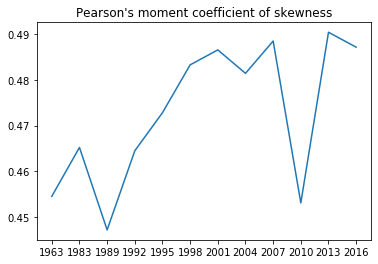

In [127]:
plt.plot(wealth_df['skewness'])
plt.title("Pearson's moment coefficient of skewness")

Text(0.5, 1.0, 'mean - median')

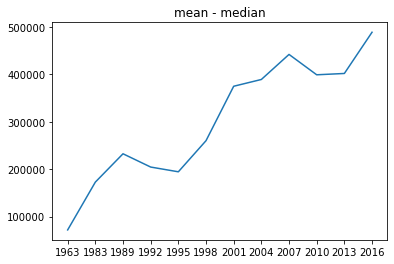

In [128]:
plt.plot((wealth_df['mean'] - wealth_df[50]))
plt.title("mean - median")

حال ستون‌های 
`mean`, `sigma`, `mu3`,`skewness`
را برای سالهای موجود در داده به شکل مثال زیر در فایل `result.csv` ذخیره کنید.

In [99]:
#sample
pd.DataFrame.from_dict({'mean': {'1963': 112722.55, '1983': 255399.02},
 'sigma': {'1963': 238287.914685003, '1983': 576079.070450784},
 'mu3': {'1963': 6.15E+16, '1983': 8.89E+17},
 'skewness': {'1963': 4.54523965, '1983': 4.65216279}}
)

,mean,sigma,mu3,skewness
1963,112722.55,238287.914685,6.150000e+16,4.545240
1983,255399.02,576079.070451,8.890000e+17,4.652163


In [161]:
wealth_df[['mean','sigma','mu3','skewness']].to_csv('result.csv',index_label='year')

نوت‌بوک را ذخیره و
**ارسال پاسخ**
را انتخاب کنید.

In [156]:
wealth_df[['mean','sigma','mu3','skewness']]

year,mean,sigma,mu3,skewness
1963,112722.55,2.382879e+05,6.149826e+16,0.454524
1983,255399.02,5.760791e+05,8.894083e+17,0.465216
1989,320275.10,7.292202e+05,1.734003e+18,0.447171
1992,287795.15,6.695417e+05,1.394158e+18,0.464493
1995,284937.86,6.478374e+05,1.285567e+18,0.472821
1998,365908.21,8.787688e+05,3.279718e+18,0.483295
2001,492574.90,1.242595e+06,9.335421e+18,0.486569
2004,507774.71,1.249293e+06,9.387218e+18,0.481442
2007,582394.69,1.521162e+06,1.719509e+19,0.488515
2010,484383.11,1.248762e+06,8.822985e+18,0.453082
